# Instacart Exploratory Data Analysis
Downloaded from: https://www.kaggle.com/c/instacart-market-basket-analysis

Marina Oliveira / Capstone


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Loading and examining the data (different tables)

In [2]:
#set with aisles where products are found inside the e-store
aisles = pd.read_csv('./datasets/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
#set with additional information on the orders from orderts table defined as prior in 
# the 'Eval_set' column
order_prior = pd.read_csv('./datasets/order_products__prior.csv')

In [4]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
#set with additional information on the orders from orderts table defined as train in 
# the 'Eval_set' column
order_train = pd.read_csv('./datasets/order_products__train.csv')

In [6]:
order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
#set containing information about orders / user id without the products on each order
orders = pd.read_csv('./datasets/orders.csv')

In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
#set with products table / departments
prod = pd.read_csv('./datasets/products.csv')

In [10]:
prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
#set with departments names and id
dept1 = pd.read_csv('./datasets/departments.csv')

In [12]:
dept1.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
#merging data: getting user_id and days_since_prior_order to order_train from ordersub table
order_train = order_train.merge(orders[['user_id', 'days_since_prior_order', 'order_id',\
                                        'order_hour_of_day','order_dow']],\
                                left_on = 'order_id', right_on = 'order_id', how = 'inner')

In [14]:
#merging data: getting department id from products table
dept = prod[['product_id','department_id']]
order_train = pd.merge(order_train, dept, on='product_id')

In [15]:
order_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,order_hour_of_day,order_dow,department_id
0,1,49302,1,1,112108,9.0,10,4,16
1,816049,49302,7,1,47901,16.0,6,4,16
2,1242203,49302,1,1,2993,7.0,7,0,16
3,1383349,49302,11,1,41425,14.0,8,3,16
4,1787378,49302,8,0,187205,30.0,14,4,16


In [16]:
#merging data: getting user_id and days_since_prior_order to order_prior from ordersub table
order_prior = order_prior.merge(orders[['user_id', 'days_since_prior_order', 'order_id', \
                                        'order_hour_of_day','order_dow']],\
                                left_on = 'order_id', right_on = 'order_id', how = 'inner')

In [17]:
#merging data: getting department id from products table
order_prior = pd.merge(order_prior, dept, on='product_id')

In [18]:
#new order_train table
order_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,order_hour_of_day,order_dow,department_id
0,1,49302,1,1,112108,9.0,10,4,16
1,816049,49302,7,1,47901,16.0,6,4,16
2,1242203,49302,1,1,2993,7.0,7,0,16
3,1383349,49302,11,1,41425,14.0,8,3,16
4,1787378,49302,8,0,187205,30.0,14,4,16


In [19]:
#new order_prior table
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,order_hour_of_day,order_dow,department_id
0,2,33120,1,1,202279,8.0,9,5,16
1,26,33120,5,0,153404,7.0,16,0,16
2,120,33120,13,0,23750,10.0,8,6,16
3,327,33120,5,1,58707,8.0,9,6,16
4,390,33120,28,1,166654,9.0,12,0,16


In [20]:
#merging data: creating one bigger table with product information / department and aisle
prod = prod.merge(aisles[['aisle', 'aisle_id']],\
                                left_on = 'aisle_id', right_on = 'aisle_id', how = 'inner')

In [21]:
prod = prod.merge(dept1[['department', 'department_id']],\
                                left_on = 'department_id', right_on = 'department_id', how = 'inner')

In [22]:
#final products table
prod.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


# Cheking new tables:
order_train and order_prior
1. Shape
2. Examining missing values

In [23]:
order_train.shape

(1384617, 9)

In [24]:
print order_train.user_id.min()
print order_train.user_id.max()

1
206209


In [25]:
order_prior.shape

(32434489, 9)

In [26]:
order_train.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
days_since_prior_order    0
order_hour_of_day         0
order_dow                 0
department_id             0
dtype: int64

In [27]:
order_prior.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
days_since_prior_order    2078068
order_hour_of_day               0
order_dow                       0
department_id                   0
dtype: int64

In [28]:
print order_prior.user_id.min()
print order_prior.user_id.max()

1
206209


# EDA
Visualizing how the data is distributed by using groupby and some charts.

In [29]:
#Understanding data based on user_id and order_id
ot_user_order = order_train.groupby(['user_id','order_id'])

In [30]:
ot_user_order.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,order_hour_of_day,order_dow,department_id
0,1,49302,1,1,112108,9.0,10,4,16
1,816049,49302,7,1,47901,16.0,6,4,16
2,1242203,49302,1,1,2993,7.0,7,0,16
3,1383349,49302,11,1,41425,14.0,8,3,16
4,1787378,49302,8,0,187205,30.0,14,4,16
5,2445303,49302,2,1,199120,7.0,20,3,16
6,2853065,49302,12,1,145852,15.0,19,1,16
7,3231517,49302,6,1,63189,7.0,13,2,16
8,1,11109,2,1,112108,9.0,10,4,16
9,68474,11109,8,1,67333,4.0,17,4,16


In [31]:
#Understanding data based on user_id and product_id / number of same item purchased by user
produser = order_train.groupby(['product_id','user_id']).sum()

In [32]:
produser.head()

order_id  add_to_cart_order  reordered  \
product_id user_id                                           
1          751         63770                  4          0   
           1540         6695                  7          1   
           2221       767323                  5          0   
           9694       304053                  3          1   
           13916     1028477                  2          0   

                    days_since_prior_order  order_hour_of_day  order_dow  \
product_id user_id                                                         
1          751                        30.0                  6          2   
           1540                        8.0                  1          1   
           2221                       16.0                 19          5   
           9694                        2.0                 11          4   
           13916                      23.0                  9          3   

                    department_id  
product_id user_id                 
1          751                 19  
           1540                19  
           2221                19  
           9694                19  
           13916               19

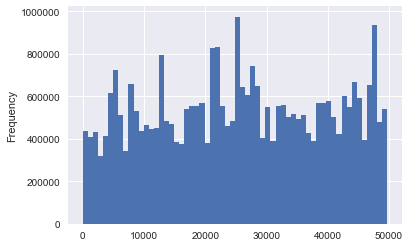

In [33]:
#Plotting target to check distribution = product_id
order_prior['product_id'].plot(kind='hist', bins=60)

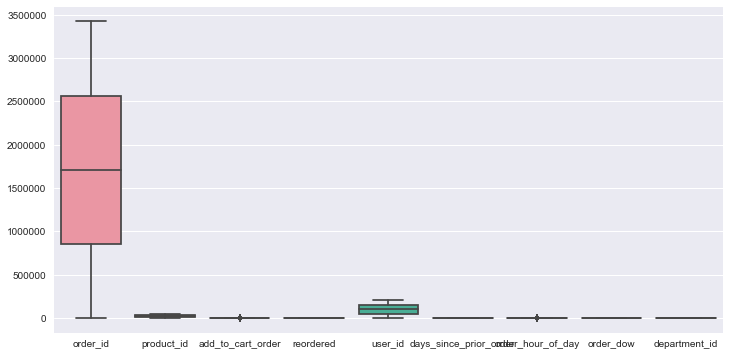

In [34]:
#Trying a boxplot with all the data (prior set) but it does not look useful
fig, my_ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = order_prior, ax = my_ax)

In [36]:
#Standardizing the data to see if the boxplot looks better
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(order_prior)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
fig, my_ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = data, ax = my_ax)

In [ ]:
#trying to see if there is correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(order_prior.corr(), annot=True) 

In [ ]:
#Figuring out the days of the week with bigger number of orders.
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency by week day", fontsize=15)
plt.show()

In [ ]:
#Figuring out the hours of day with bigger number of orders.
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency hour of day", fontsize=15)
plt.show()

In [ ]:
#Checking relationship between day of the week and hour of day
dow_daytime = orders.groupby(['order_dow', 'order_hour_of_day'])['order_dow'].agg(['count']).reset_index()

fig, ax = plt.subplots()
labels = []

for i, group in dow_daytime.groupby('order_dow'):
    ax = group.plot(ax=ax, x='order_hour_of_day', y='count', figsize=(12,8))
    labels.append(i)

lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.suptitle('Orders by day and time', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Orders')
plt.xticks(range(0,24))

plt.show()

In [ ]:
#Concatenating prior and train sets after merging them with orders table
#The idea is to have a general orders table to check products frequency
total = pd.concat([order_prior, order_train])
total_prods = total.groupby(['order_id'])['order_id'].count()


In [ ]:
#Searching for the top 30 most purchased products:
prodmost = total.groupby(['product_id'])['product_id'].agg(['count']).sort_values(by='count', ascending=False).reset_index()
prodmost_name = prodmost[:30].merge(prod[['product_id', 'product_name', 'department_id']], how='left', on=['product_id']).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(prodmost_name['product_name'].values, prodmost_name['count'].values, alpha=0.8)
plt.ylabel('Total_purchases', fontsize=12)
plt.xlabel('Product_name', fontsize=12)
plt.title("Purchased Top 30", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Searching for the top 30 most reordered products:
reodmost = total.groupby('product_id')['reordered'].sum().reset_index().sort_values('reordered', ascending=False)
reodmost_name = reodmost[:30].merge(prod[['product_id', 'product_name', 'department_id']], how='left', on=['product_id']).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(reodmost_name['product_name'].values, reodmost_name['reordered'].values, alpha=0.8)
plt.ylabel('Total_reordered', fontsize=12)
plt.xlabel('Product_name', fontsize=12)
plt.title("Reordered Top 30", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Figuring out in each day of the week the reorders are more frequently.
df = order_train.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(df['order_dow'].values, df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder mean across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

In [ ]:
#Figuring out in each day of the week the reorders are more frequently.
df1 = order_train.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(df1['order_hour_of_day'].values, df1['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder mean across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

In [ ]:
#Visualizing missing values
fig, ax = plt.subplots(figsize=(6,12))

ax.pcolor(order_prior.isnull(), cmap='plasma')
ax.set_ylabel("Row number")
ax.set_xlabel("Feature")
ax.set_xticklabels(order_prior.columns)
plt.show()

In [ ]:
order_prior.head()